# Import Libraries

In [2]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
%matplotlib inline
import venn
import matplotlib.pyplot as plt
import seaborn as sns
import mygene as myg
import csv

# Import all the datatables into pandas data frames

In [3]:
hisat2 = pd.read_csv(r'FinalResultsTables/HISAT2_res_filt.csv', delimiter=',')
bowtie = pd.read_csv(r'FinalResultsTables/bowtie2_res_filt.csv', delimiter=',')
kallisto = pd.read_csv(r'FinalResultsTables/Kallisto_res_filt.csv', delimiter=',')
star = pd.read_csv(r'FinalResultsTables/STAR_res_filt.csv', delimiter=',')

#### Find the length of the L2FC column to make list for aligner identification

In [4]:
star_len = np.repeat('STAR',len(star.log2FoldChange.tolist()))
bowtie_len = np.repeat('Bowtie2',len(bowtie.log2FoldChange.tolist()))
hisat_len = np.repeat('HISAT2',len(hisat2.log2FoldChange.tolist()))
kal_len = np.repeat('Kallisto',len(kallisto.log2FoldChange.tolist()))

#### Concatenate columns from each data frame to make arrays of aligner ID, length, L2FC, pval, and padj

In [5]:
concat_names = np.concatenate((np.asarray(star_len),
                 np.asarray(hisat_len),
                 np.asarray(kal_len),
                 np.asarray(bowtie_len)))

In [6]:
concat_log2FC =  np.concatenate((np.asarray(star.log2FoldChange.tolist()), 
                 np.asarray(hisat2.log2FoldChange.tolist()),
                 np.asarray(kallisto.log2FoldChange.tolist()),
                 np.asarray(bowtie.log2FoldChange.tolist())))

In [7]:
concat_pval =  np.concatenate((np.asarray(star.pval.tolist()), 
                 np.asarray(hisat2.pval.tolist()),
                 np.asarray(kallisto.pval.tolist()),
                 np.asarray(bowtie.pval.tolist())))

In [8]:
concat_padj =  np.concatenate((np.asarray(star.padj.tolist()),
                 np.asarray(hisat2.padj.tolist()),
                 np.asarray(kallisto.padj.tolist()),
                 np.asarray(bowtie.padj.tolist())))

In [9]:
concat_id =  np.concatenate((np.asarray(star.id.tolist()), 
                 np.asarray(hisat2.id.tolist()),
                 np.asarray(kallisto.id.tolist()),
                 np.asarray(bowtie.id.tolist())))

In [10]:
 df = pd.DataFrame({'id': concat_id,
                    'Aligner': concat_names,
                   'L2FC': concat_log2FC,
                    'pvalue': concat_pval,
                    'padj': concat_padj
                   })

In [14]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(how="any") # remove all rows containing inf and/or NaN values

#### Partition signifcantly (p<0.05) upregulated and downregulated genes into dataframes

In [15]:
up_down = []
for x in df.L2FC:
    if x == 0:
        up_down.append('None')
    elif x > 0:
        up_down.append('Up')
    else:
        up_down.append('Down')
df['PolarityLFC'] = up_down
df_LFCFiltered = df[(df.PolarityLFC == 'Up') | (df.PolarityLFC == 'Down')]
df_SigLFCFiltered = df_LFCFiltered[(df_LFCFiltered.pvalue < 0.05)]

# Violin Plots

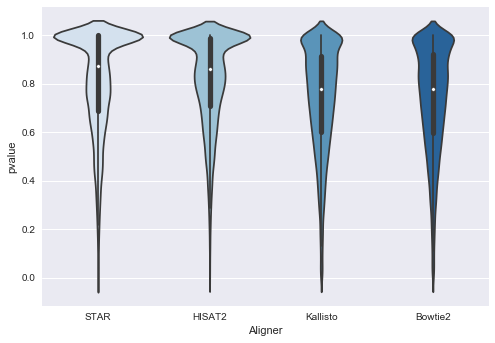

In [16]:
fig = plt.figure()
pval_vlnplot = sns.violinplot(x="Aligner", y="pvalue", data=df, palette="Blues")
plt.savefig('pval_vlnplot')

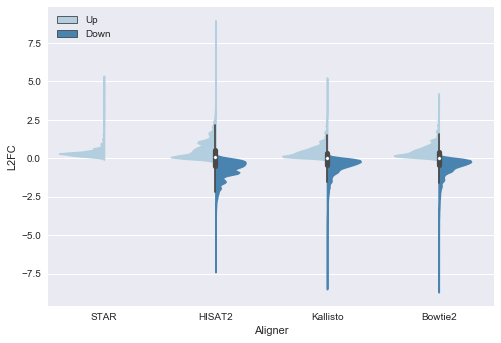

In [18]:
fig2 = plt.figure()
L2FC_vlnplot = sns.violinplot(x="Aligner", y="L2FC", 
                             split=True, hue="PolarityLFC", data=df_LFCFiltered, palette="Blues")
plt.legend(loc='upper left')
plt.savefig('L2FC_vlnplot')

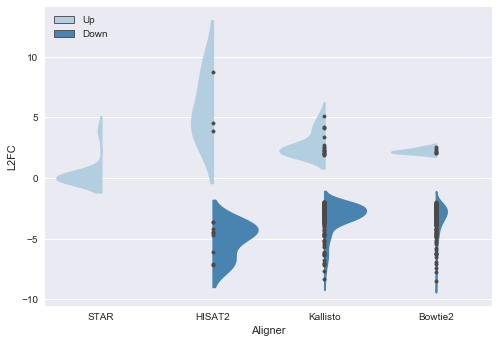

In [20]:
fig3 = plt.figure()
L2FC_vlnplot_sig = sns.violinplot(x="Aligner", y="L2FC", 
                             split=True, hue="PolarityLFC", data=df_SigLFCFiltered, palette="Blues", inner = "points")
plt.legend(loc='upper left')
plt.savefig('sig_L2FC_vlnplot')

# Venn Diagrams

In [56]:
star_id = df_SigLFCFiltered[(df_SigLFCFiltered['Aligner'] == 'STAR')]
kallisto_id = df_SigLFCFiltered[(df_SigLFCFiltered['Aligner'] == 'Kallisto')]
hisat_id = df_SigLFCFiltered[(df_SigLFCFiltered['Aligner'] == 'HISAT2')]
bowtie_id = df_SigLFCFiltered[(df_SigLFCFiltered['Aligner'] == 'Bowtie2')]

In [ ]:
fig5 = plt.figure()
setlist = list(map(set, [star_id.id, kallisto_id.id, hisat_id.id, bowtie_id.id]))
labels = venn.generate_petal_labels(setlist)
fig, ax = venn.venn4(labels, names=['STAR', 'Kallisto', 'HISAT2', 'Bowtie2'])
fig.show()
plt.savefig('DE Gene Count Venn')

In [344]:
star_upid = star_id[(star_id.L2FC>0)]
kallisto_upid = kallisto_id[(kallisto_id.L2FC>0)]
hisat_upid = hisat_id[(hisat_id.L2FC>0)]
bowtie_upid = bowtie_id[(bowtie_id.L2FC>0)]

star_downid = star_id[(star_id.L2FC<0)]
kallisto_downid = kallisto_id[(kallisto_id.L2FC<0)]
hisat_downid = hisat_id[(hisat_id.L2FC<0)]
bowtie_downid = bowtie_id[(bowtie_id.L2FC<0)]

c:\users\benjy\anaconda3\lib\site-packages\venn\_backwards_compatibility.py:32: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"
c:\users\benjy\anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


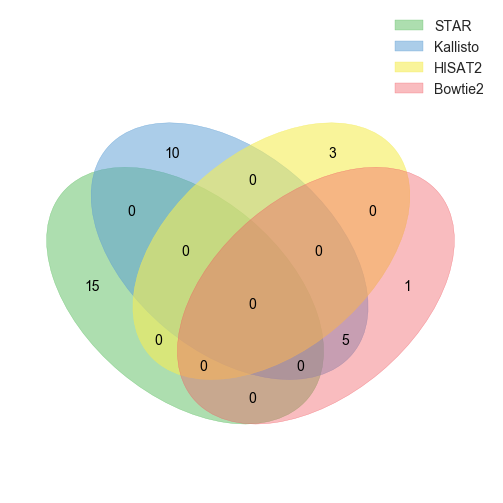

In [345]:
fig6 = plt.figure()
up_setlist = list(map(set, [star_upid.id, kallisto_upid.id, hisat_upid.id, bowtie_upid.id]))
labels = venn.generate_petal_labels(up_setlist)
fig, ax = venn.venn4(labels, names=['STAR', 'Kallisto', 'HISAT2', 'Bowtie2'])
fig.show()
plt.savefig('upregulated Venn')

In [355]:
sharedup = list(set(kallisto_upid.id).intersection(set(bowtie_upid.id)))
sharedup = [x.split('.')[0] for x in sharedup]
sharedup_symbol = mg.querymany(sharedup , scopes='ensembl.gene', fields='symbol', species='mouse', returnall = True)

querying 1-5...done.
Finished.


In [358]:
[sharedup_symbol['out'][x]['symbol'] for x in range(len(sharedup_symbol['out']))]

['Gm42613', 'Nfil3', 'Arntl', 'Gm43605', 'Gm43166']

c:\users\benjy\anaconda3\lib\site-packages\venn\_backwards_compatibility.py:32: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"
c:\users\benjy\anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


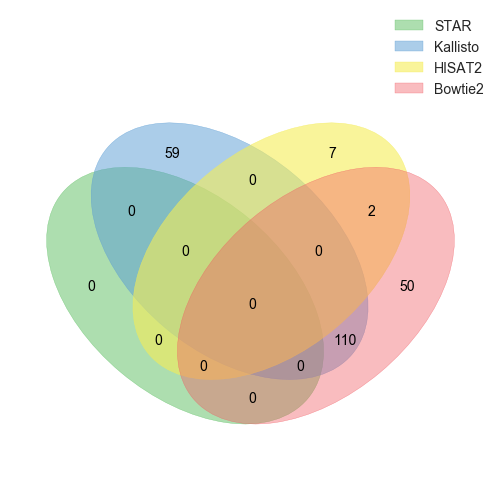

In [359]:
fig7 = plt.figure()
down_setlist = list(map(set, [star_downid.id, kallisto_downid.id, hisat_downid.id, bowtie_downid.id]))
labels = venn.generate_petal_labels(down_setlist)
fig, ax = venn.venn4(labels, names=['STAR', 'Kallisto', 'HISAT2', 'Bowtie2'])
fig.show()
plt.savefig('downregulated Venn')

In [370]:
shareddown = list(set(kallisto_downid.id).intersection(set(bowtie_downid.id)))
np.savetxt('shareddown', [x.split('.')[0] for x in shareddown], fmt="%s", delimiter = ',')
#shareddown_symbol = mg.querymany(shareddown , scopes='ensembl.gene', fields='symbol', species='mouse', returnall = True)

# EnsemblID to gene symbol

In [54]:
# create individual data frames of ensembl IDs for each aligner because they're not the same length
full_ensemblID_dflist = list(map(pd.DataFrame,[star_id, hisat_id, bowtie_id, kallisto_id]))

# save each list as a csv file
names = ['star', 'hisat', 'bowtie', 'kallisto']
n=0
for l in full_ensemblID_dflist:
    l.to_csv(names[n]+'_full_ensemblIDs.csv', index=False)
    n+=1

In [67]:
# cut off isoform number for gene symbol identification
star_geneList = [x.split('.')[0] for x in star_id.id]
hisat_geneList = [x.split('.')[0] for x in hisat_id.id]
bowtie_geneList = [x.split('.')[0] for x in bowtie_id.id]
kallisto_geneList = [x.split('.')[0] for x in kallisto_id.id]

In [77]:
# create individual data frames of ensembl IDs for each aligner because they're not the same length
truncID_dflist = list(map(pd.DataFrame,[star_geneList, hisat_geneList, bowtie_geneList, kallisto_geneList]))

# save each list as a csv file
names = ['star', 'hisat', 'bowtie', 'kallisto']
n=0
for l in truncID_dflist:
    l.to_csv(names[n]+'_truncID.csv', index=False)
    n+=1

In [19]:
mg = myg.MyGeneInfo()
star_geneDict = mg.querymany(star_geneList , scopes='ensembl.gene', fields='symbol', species='mouse', returnall = True)
hisat_geneDict = mg.querymany(hisat_geneList , scopes='ensembl.gene', fields='symbol', species='mouse', returnall = True)
bowtie_geneDict = mg.querymany(bowtie_geneList , scopes='ensembl.gene', fields='symbol', species='mouse', returnall = True)
kallisto_geneDict = mg.querymany(kallisto_geneList , scopes='ensembl.gene', fields='symbol', species='mouse', returnall = True)

NameError: name 'star_geneList' is not defined

In [43]:
#np.save('star_geneDict', star_geneDict)
#np.save('hisat_geneDict', hisat_geneDict)
#np.save('bowtie_geneDict', bowtie_geneDict)
#np.save('kallisto_geneDict', kallisto_geneDict)
kallisto_geneDict=np.load('kallisto_geneDict.npy').item()
bowtie_geneDict=np.load('bowtie_geneDict.npy').item()
hisat_geneDict=np.load('hisat_geneDict.npy').item()
star_geneDict=np.load('star_geneDict.npy').item()

In [24]:
# get the gene symbols from MyGene dictionary corresponding to ensembl IDs as a list
def getSymList(geneDict):
    symbols = []
    ids = []
    out = geneDict['out']
    for i in range(len(out)):
        if 'symbol' in out[i].keys():
            symbols.append(out[i]['symbol'])
            ids.append(out[i]['query'])
    return {'ids': ids, 'syms': symbols}

star_geneSymsID = getSymList(star_geneDict)
hisat_geneSymsID = getSymList(hisat_geneDict)
bowtie_geneSymsID = getSymList(bowtie_geneDict)
kallisto_geneSymsID = getSymList(kallisto_geneDict)

# create individual data frames of gene symbols for each aligner because they're not the same length
geneSymsID_dictlist = list(map(pd.DataFrame,[star_geneSymsID, hisat_geneSymsID, bowtie_geneSymsID, kallisto_geneSymsID]))

In [18]:
# save each list as a csv file
names = ['star', 'hisat', 'bowtie', 'kallisto']
n=0
for l in geneSymsID_dictlist:
    l.to_csv(names[n]+'_geneSymbolsIDs.csv', index=False)
    n+=1

In [ ]:
kallisto_idx = pd.Index(kallisto.pval)
star_idx = pd.Index(star.pval)
hisat2_idx = pd.Index(hisat2.pval)
bowtie_idx = pd.Index(bowtie.pval)

# get ensembl ids for top 20 differentially expressed genes
kallisto_top20_idx = [kallisto_idx.get_loc(i) for i in [np.sort(kallisto.pval)[i] for i in range(20)]]
bowtie_top20_idx = [bowtie_idx.get_loc(i) for i in [np.sort(bowtie.pval)[i] for i in range(20)]]
hisat2_top20_idx = [hisat2_idx.get_loc(i) for i in [np.sort(hisat2.pval)[i] for i in range(20)]]
star_top20_idx = [star_idx.get_loc(i) for i in [np.sort(star.pval)[i] for i in range(20)]]

kallisto_top20_ids = list(kallisto.id[kallisto_top20_idx])
bowtie_top20_ids = list(bowtie.id[bowtie_top20_idx])
hisat2_top20_ids = list(hisat2.id[hisat2_top20_idx])
star_top20_ids = list(star.id[star_top20_idx])

df_top20_ids = pd.DataFrame({
    'kallisto': kallisto_top20_ids,
    'bowtie': bowtie_top20_ids,
    'hisat2': hisat2_top20_ids,
    'star': star_top20_ids
})

df_top20_idx = pd.DataFrame({
    'kallisto': kallisto_top20_idx,
    'bowtie': bowtie_top20_idx,
    'hisat2': hisat2_top20_idx,
    'star': star_top20_idx
})
df_top20_ids;

In [ ]:
scatter_matrix(df_top20_idx)

In [ ]:
# create individual data frames of ensembl IDs for each aligner because they're not the same length
ensemblID_dflist = list(map(pd.DataFrame,[star_geneList, hisat_geneList, bowtie_geneList, kallisto_geneList]))

# save each list as a csv file
names = ['star', 'hisat', 'bowtie', 'kallisto']
n=0
for l in ensemblID_dflist:
    l.to_csv(names[n]+'_ensemblIDs.csv', index=False)
    n+=1

# Pathway Analysis

In [25]:
from IPython.display import display

In [89]:
hisat2_panther = pd.read_csv(r'FinalResultsTables/hisat_pantherChart.txt', delimiter='\t', header=None)
bowtie_panther = pd.read_csv(r'FinalResultsTables/bowtie_pantherChart.txt', delimiter='\t', header=None)
kallisto_panther = pd.read_csv(r'FinalResultsTables/kallisto_pantherChart.txt', delimiter='\t', header=None)
star_panther = pd.read_csv(r'FinalResultsTables/star_pantherChart.txt', delimiter='\t', header=None)

In [90]:
hisat2_biopanther = pd.read_csv(r'FinalResultsTables/hisat_pantherBiologicalChart.txt', delimiter='\t', header=None)
bowtie_biopanther = pd.read_csv(r'FinalResultsTables/bowtie_pantherBiologicalChart.txt', delimiter='\t', header=None)
kallisto_biopanther = pd.read_csv(r'FinalResultsTables/kallisto_pantherBiologicalChart.txt', delimiter='\t', header=None)
star_biopanther = pd.read_csv(r'FinalResultsTables/star_pantherBiologicalChart.txt', delimiter='\t', header=None)

In [92]:
panther_df = pd.merge(hisat2_panther, bowtie_panther, on=1, how='outer')
panther_df = panther_df.drop(['0_x','3_x','4_x','0_y', '3_y', '4_y'], axis=1)
panther_df = pd.merge(panther_df, star_panther, on=1, how='outer')
panther_df = panther_df.drop([0,3,4], axis=1)
panther_df = pd.merge(panther_df, kallisto_panther, on=1, how='outer')
panther_df = panther_df.drop(['0',3,4,0], axis=1)
panther_df.columns = ["GO","HISAT2", "Bowtie2", "STAR", "Kallisto"]
panther_df = panther_df.replace(np.nan, 0)
#panther_df['HISAT2'] = list(map(int,panther_df['HISAT2']))

panther_df['HISAT2'] = list(map(int,panther_df['HISAT2']))
panther_df['STAR'] = list(map(int,panther_df['STAR']))
#panther_df[list(panther_df.columns[1:5])]
#display(panther_df)
#panther_df.to_csv('panther_df.csv')

In [104]:
biopanther_df = pd.merge(hisat2_biopanther, bowtie_biopanther, on=1, how='outer')
biopanther_df = biopanther_df.drop(['0_x','3_x','4_x','0_y', '3_y', '4_y'], axis=1)
biopanther_df = pd.merge(biopanther_df, star_biopanther, on=1, how='outer')
biopanther_df = biopanther_df.drop([0,3,4], axis=1)
biopanther_df = pd.merge(biopanther_df, kallisto_biopanther, on=1, how='outer')
biopanther_df = biopanther_df.drop(['0',0,3,4], axis=1)
biopanther_df.columns = ["GO","HISAT2", "Bowtie2", "STAR", "Kallisto"]
biopanther_df = biopanther_df.replace(np.nan, 0)

biopanther_df['HISAT2'] = list(map(int,biopanther_df['HISAT2']))
biopanther_df['STAR'] = list(map(int,biopanther_df['STAR']))

biopanther_df.to_csv('biopanther_df.csv')

In [253]:
x_panther = list(set(list(bowtie_panther[1]) + list(hisat2_panther[1]) + list(kallisto_panther[1]) + list(star_panther[1])))
x_biopanther = list(set(list(bowtie_biopanther[1]) + list(hisat2_biopanther[1]) + list(kallisto_biopanther[1]) + list(star_biopanther[1])))

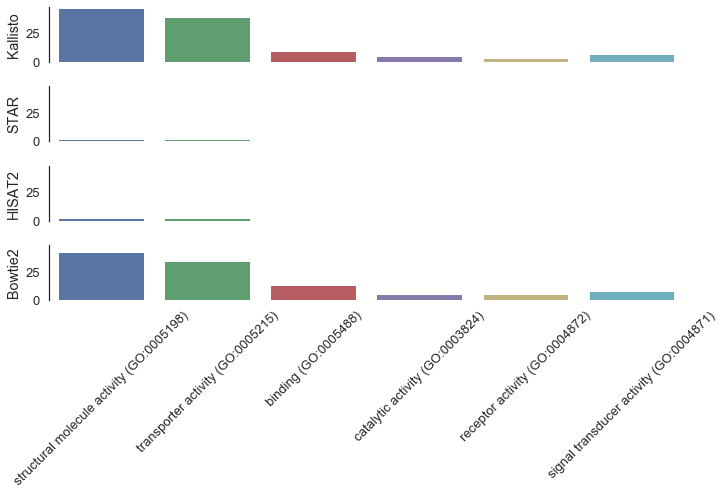

In [299]:
fig9 = plt.figure()
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, sharey=True)

x = set()

# Generate some sequential data
x = x_panther
y1 = list(panther_df["bowtie"])
bowtie_bar = sns.barplot(x=x, y=y1, ax=ax4)
bowtie_bar.set_xticklabels(bowtie_bar.get_xticklabels(),rotation=45)
ax4.set_ylabel("Bowtie2")

# Center the data to make it diverging
y2 = list(panther_df["hisat2"])
hisat2_bar = sns.barplot(x=x, y=y2, ax=ax3)
ax3.set_ylabel("HISAT2")

# Randomly reorder the data to make it qualitative
y3 = list(panther_df["star"])
star_bar = sns.barplot(x=x, y=y3, ax=ax2)
ax2.set_ylabel("STAR")

# Randomly reorder the data to make it qualitative
y4 = list(panther_df["kallisto"])
kallisto_bar = sns.barplot(x=x, y=y4, ax=ax1)
ax1.set_ylabel("Kallisto")

# Finalize the plot
sns.despine(bottom=True)

plt.tight_layout()
plt.savefig('PantherGraph.png', pad_inches=0)

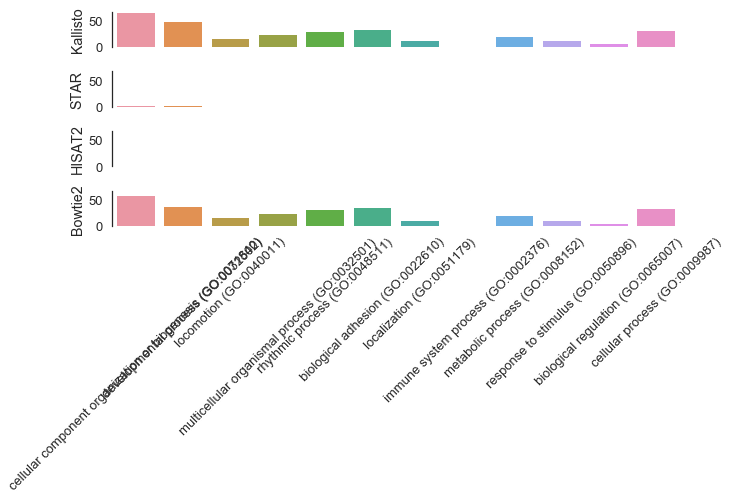

In [306]:
fig10 = plt.figure()
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, sharey=True)

x = set()

# Generate some sequential data
x = x_biopanther
y1 = list(biopanther_df["bowtie"])
bowtie_bar = sns.barplot(x=x, y=y1, ax=ax4)
bowtie_bar.set_xticklabels(bowtie_bar.get_xticklabels(),rotation=45)
ax4.set_ylabel("Bowtie2")

# Center the data to make it diverging
y2 = list(biopanther_df["hisat2"])
hisat2_bar = sns.barplot(x=x, y=y2, ax=ax3)
ax3.set_ylabel("HISAT2")

# Randomly reorder the data to make it qualitative
y3 = list(biopanther_df["star"])
star_bar = sns.barplot(x=x, y=y3, ax=ax2)
ax2.set_ylabel("STAR")

# Randomly reorder the data to make it qualitative
y4 = list(biopanther_df["kallisto"])
kallisto_bar = sns.barplot(x=x, y=y4, ax=ax1)
ax1.set_ylabel("Kallisto")

# Finalize the plot
sns.despine(bottom=True)

plt.tight_layout()
plt.savefig('BioPantherGraph.png')

**Gene Ontology and Pathway Analysis (Unused)**

In [ ]:
# Get http://geneontology.org/ontology/go-basic.obo
from goatools.base import download_go_basic_obo
obo_fname = download_go_basic_obo()

# Get ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz
from goatools.base import download_ncbi_associations
gene2go = download_ncbi_associations()

In [ ]:
# load associations
from __future__ import print_function
from goatools.associations import read_ncbi_gene2go

geneid2gos_mouse = read_ncbi_gene2go("gene2go", taxids=[10090])

print("{N:,} annotated mouse genes".format(N=len(geneid2gos_mouse)))

In [ ]:
# load ontologies
from goatools.obo_parser import GODag

obodag = GODag("go-basic.obo")

In [ ]:
obodag.draw_lineage([obodag['GO:0000001']], lineage_img='GO:0000001'+'lineage.png')

In [ ]:
from IPython.display import Image
Image('GO_lineage.png')

In [ ]:
import Bio.UniProt.GOA as GOA

In [ ]:
import os
from ftplib import FTP
mus_uri = 'pub/databases/GO/goa/MOUSE/goa_mouse.gaf.gz'
mus_fn = mus_uri.split('/')[-1]

# Check if the file exists already
mus_gaf = os.path.join('./', mus_fn)
if(not os.path.isfile(mus_gaf)):
    # Login to FTP server
    ebi_ftp = FTP('ftp.ebi.ac.uk')
    ebi_ftp.login() # Logs in anonymously
    
    # Download
    with open(mus_gaf,'wb') as mus_fp:
        ebi_ftp.retrbinary('RETR {}'.format(mus_uri), mus_fp.write)
        
    # Logout from FTP server
    ebi_ftp.quit()

In [ ]:
import gzip

# File is a gunzip file, so we need to open it in this way
with gzip.open(mus_gaf, 'rt') as mus_gaf_fp:
    mus_funcs = {}  # Initialise the dictionary of functions
    
    # Iterate on each function using Bio.UniProt.GOA library.
    for entry in GOA.gafiterator(mus_gaf_fp):
        uniprot_id = entry.pop('DB_Object_ID')
        mus_funcs[uniprot_id] = entry

In [ ]:
keyword = 'growth'
growth_dict = {x: mus_funcs[x]
               for x in mus_funcs 
               if keyword in mus_funcs[x]['DB_Object_Name']}

In [ ]:
from goatools.go_enrichment import GOEnrichmentStudy

In [ ]:
pop = mus_funcs.keys()
assoc = {}

for x in mus_funcs:
    if x not in assoc:
        assoc[x] = set()
    assoc[x].add(str(mus_funcs[x]['GO_ID']))


study = growth_dict.keys()

In [ ]:
methods = ["bonferroni", "sidak", "holm", "fdr"]

g = GOEnrichmentStudy(pop, assoc, obodag,
                         propagate_counts=True,
                         alpha=0.05,
                         methods=['bonferroni'])
g_res = g.run_study(study)

In [ ]:
g.print_results(g_res, min_ratio=None, pval=0.05)